In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

O Cenário anterior tinha o problema dos comboios muito compridos. Limitei o fluxo a 1980 veículos/hora em cada sentido. Comboios de no máximo 22 carros por faixa.

In [2]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/')
dr_events_filename_template = scenarios_folder + 'av_paulista_{}_scenario/events.xml'

In [3]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if child.attrib['type'] == 'arrival' and (len(prefix) == 0 or (prefix in child.attrib['person'])):
            # Sample arrival event:
            # <event time="918" type="arrival" person="paraiso5_79" vehicle="paraiso5_79" 
            #     link="40" legMode="car" trip_time="205" distance="2825" action="ok"/>

            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [4]:
dfs = []
scenarios = [
    'regular_1980_0', 
    'digital_rails_1980_0', 
    'digital_rails_1980_33', 
    'digital_rails_1980_66', 
    'digital_rails_1980_100'
]

names = ['re', 'dr_0', 'dr_33', 'dr_66', 'dr_100']

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=names)
df.describe()

re                        dr_0                       dr_33  \
       trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s   
count  3960.000000    3960.000000  3960.000000    3960.000000  3960.000000   
mean    491.691414      20.546460   441.233081      22.475050   355.893434   
std      89.631858       3.160925    46.713407       2.089766   119.184423   
min     311.000000      13.523936   295.000000      16.672131   191.000000   
25%     415.000000      17.873462   407.000000      21.055901   205.000000   
50%     471.000000      20.436207   436.000000      22.302632   397.000000   
75%     568.000000      22.957111   470.000000      23.885139   439.000000   
max     752.000000      30.490032   610.000000      32.143729   600.000000   

                            dr_66                      dr_100                 
      avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  
count    3960.000000  3960.000000    3960.000000  3960.000000    3960.000000  
mean       31.770586   278.860354      40.617763   198.000000      49.627915  
std        12.759662   119.052226      12.821854     7.000884       0.018161  
min        16.950000   191.000000      14.507846   191.000000      49.609756  
25%        22.207026   191.000000      24.067005   191.000000      49.609756  
50%        24.272076   205.000000      49.609756   198.000000      49.627915  
75%        49.609756   401.000000      49.646073   205.000000      49.646073  
max        49.646073   701.000000      49.646073   205.000000      49.646073

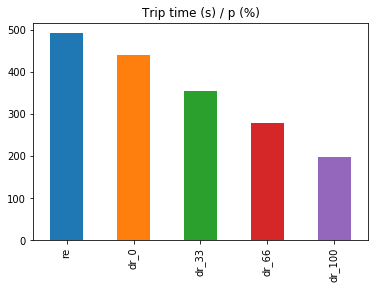

In [5]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time (s) / p (%)')

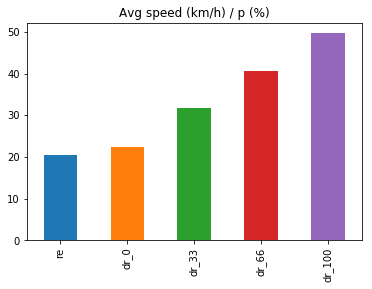

In [6]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions / p')

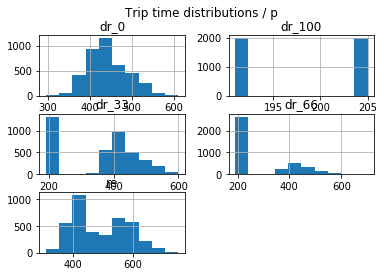

In [7]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

Text(0.5,0.98,'Trip time distributions / p')

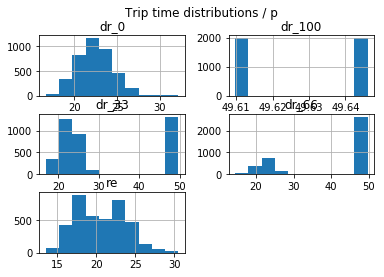

In [8]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Trip time distributions / p')

In [9]:
dfs = []
scenarios = [
    'regular_1980_0', 
    'digital_rails_1980_0', 
    'digital_rails_1980_33', 
    'digital_rails_1980_66'
]
names = ['re', 'dr_0', 'dr_33', 'dr_66']

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=names)
df.describe()

re                        dr_0                       dr_33  \
       trip_time_s avg_speed_km/h  trip_time_s avg_speed_km/h  trip_time_s   
count  3960.000000    3960.000000  3960.000000    3960.000000  2640.000000   
mean    491.691414      20.546460   441.233081      22.475050   434.840152   
std      89.631858       3.160925    46.713407       2.089766    50.800931   
min     311.000000      13.523936   295.000000      16.672131   295.000000   
25%     415.000000      17.873462   407.000000      21.055901   397.000000   
50%     471.000000      20.436207   436.000000      22.302632   424.000000   
75%     568.000000      22.957111   470.000000      23.885139   465.250000   
max     752.000000      30.490032   610.000000      32.143729   600.000000   

                            dr_66                 
      avg_speed_km/h  trip_time_s avg_speed_km/h  
count    2640.000000  1320.000000    1320.000000  
mean       22.841921   440.581061      22.597458  
std         2.233915    56.423325       2.445840  
min        16.950000   298.000000      14.507846  
25%        21.404966   401.000000      21.143451  
50%        22.957111   429.500000      22.631026  
75%        24.272076   471.000000      24.067005  
max        32.700965   701.000000      32.492013

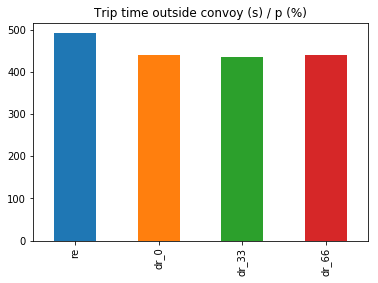

In [10]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time outside convoy (s) / p (%)')

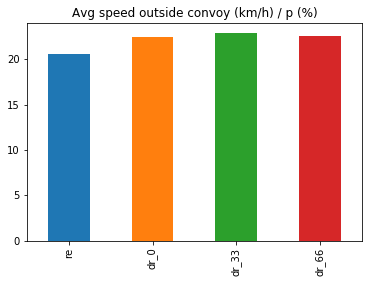

In [11]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed outside convoy (km/h) / p (%)')

Text(0.5,0.98,'Trip time distributions outside convoy / p')

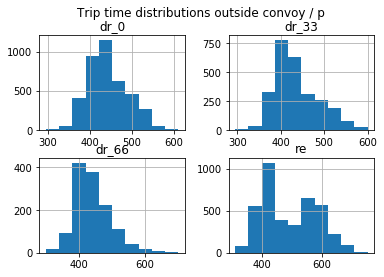

In [12]:
df.xs('trip_time_s', axis=1, level=1).hist()
plt.suptitle('Trip time distributions outside convoy / p')

Text(0.5,0.98,'Avg speed distributions outside convoy / p')

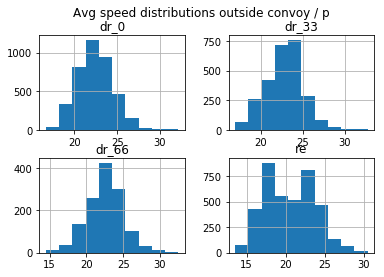

In [13]:
df.xs('avg_speed_km/h', axis=1, level=1).hist()
plt.suptitle('Avg speed distributions outside convoy / p')

- Parece que as velocidades estão ligeiramente baixas (A média da CET no horário de pico é de ~20km/h). Precisa calibrar o modelo?
- Aparentemente, aumentar a proporção de veículos nos DR aumenta a velocidade média. Isso pode ser um efeito do fato de eu ter esquecido de diferenciar a contagem entre veículos dentro e fora dos DR. Pode ser que, com mais veículos nos DR, sobre mais veículos "lentos" fora dos DR, abaixando a velocidade de cada veículo conforme o modelo de velocidades. Dá pra confirmar essa hipótese?